
The latest transmission rate beta of SIR model: 0.03193480006597664
The latest recovering rate gamma of SIR model: 0.05512799063075121
The latest basic reproduction number R0: 0.5792846737309328
[2.62187523 3.38851776 2.45791598 4.23941893 3.71095331 6.23971344
 5.11153959 4.01806934 3.3286167  4.05203058 5.73365883 5.03936064
 5.3782682  4.28934013 4.27285216 4.93924556 4.3575437  5.1011028
 3.61821651 4.78290627 4.31750379 4.38844919 4.90537505 2.97589148
 2.83180436 2.37764011 2.25308109 2.00695798 1.34996158 1.33324555
 1.20988724 1.18478068 1.29594286 1.53408864 1.65850837 1.32366534
 1.31109618 0.81446993 0.70861988 0.79171374 0.854929   0.87321861
 1.09110613 1.24611213 1.26004031 1.88973308 1.90920594 2.1906703
 1.69084937 1.46544721 1.62538031 1.57441959 1.54760324 1.37702881
 1.40401005 0.89599598 0.89665082 0.76048683 1.00017377 1.0134217
 0.52349135 0.45810737 0.57362108 0.53887555 0.57064753 0.51103755
 0.4348298  0.49422053 0.49819162 0.4973993  0.49055378 0.5352028
 0.5

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

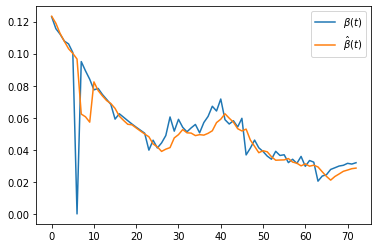

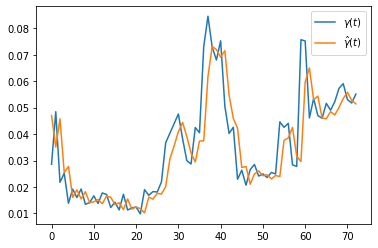

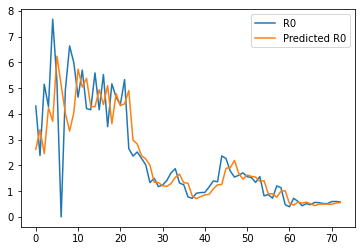

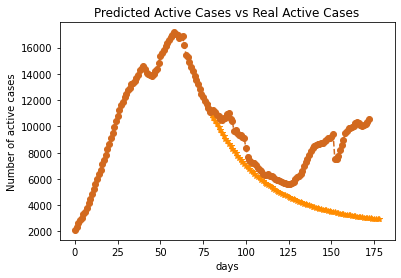

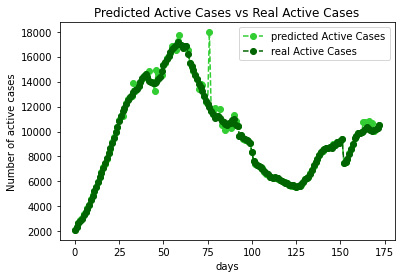

143.52601156069363
169.36
507.42976962163533
584.8192883275996


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


def data_spilt(data, orders, start):
    x_train = np.empty((len(data) - start - orders, orders))
    y_train = data[start + orders:]

    for i in range(len(data) - start - orders):
        x_train[i] = data[i + start:start + orders + i]

  
    return x_train, y_train


def ridge(x, y):
    print('\nStart searching good parameters for the task...')
    parameters = {'alpha': np.arange(0, 0.100005, 0.000005).tolist(),
                  "tol": [1e-8],
                  'fit_intercept': [True, False],
                  'normalize': [True, False]}

    clf = GridSearchCV(Ridge(), parameters, n_jobs=-1, cv=5)
    clf.fit(x, y)

    print('\nResults for the parameters grid search:')
    print('Model:', clf.best_estimator_)
    print('Score:', clf.best_score_)

    return clf


########## data ##########
# data collected from https://voice.baidu.com/act/newpneumonia/newpneumonia
# X_cml = cumulative confirmed cases
#X_cml = np.array([227702, 230578, 232982, 236225, 239587, 242969, 246376, 249808, 253261, 256732, 260223, 263729, 267258, 270810, 274376, 277955,
#281546, 285147, 289086, 293052, 297014, 303609,306339, 309649, 313626, 316875, 320126, 323402, 326495, 329293, 332603, 336142, 339667, 342974, 345605, 348772
#, 351895, 355131, 358583, 361877, 365017, 368175, 370425, 372530, 375535, 378637, 381662, 385160, 388594, 391524, 394050, 396771
#, 399463, 402205, 405277, 408236, 410849, 413332, 415705, 417909, 419996, 422246, 424405, 426397, 428295, 430313, 432364, 434465
#, 436625, 438638, 440355, 442226, 444398, 446594, 448637, 450765, 453069, 455197, 457071, 459360, 461444, 463759, 465939, 468023
#, 470136], dtype=np.float64)[:-27]
# recovered = cumulative recovered cases
#recovered = np.array([2454, 2252, 212, 215165, 217753, 220424, 223592, 226710, 229978, 232878, 236189, 239935, 243836, 247781, 251832, 255998, 259818, 263708, 268244, 271538, 274513, 277283, 281472, 285924, 289715, 293790, 297694, 301554, 305595, 310273, 314206, 317574, 320567, 324301, 327705, 331294, 336353, 341245, 344879, 348449, 351880, 356229, 360527, 364211, 367566, 371081, 374859, 379573, 382051, 384222, 385739, 386846, 388512, 390101, 391792, 393818, 395719, 397306, 199181, 400965, 402658, 404335, 406071, 408010, 410179, 412617, 415268, 418009, 420637, 423028, 425268, 427228, 429372, 431720, 433920, 436182, 438610, 440853, 442878, 445300, 447502, 449937, 452258, 454468, 456747], dtype=np.float64)[:-27]
# death = cumulative deaths
#death = np.array([708, 711, 717, 723, 726, 733, 740, 745, 751, 756, 762, 766, 776, 783, 792, 798, 805, 811, 819, 826, 838
#, 850, 859, 866, 878, 888, 902, 914, 921, 930, 947, 956, 974, 986, 1001, 1014, 1027, 1041, 1055, 1073, 1093, 1108, 1125, 1140
#, 1145, 1164, 1182, 1198, 1213, 1221, 1238, 1253, 1269, 1286, 1296, 1310, 1322, 1335, 1345, 1353, 1369, 1378, 1388, 1395, 1402
#, 1406, 1414, 1424, 1428, 1433, 1438, 1445, 1451, 1456, 1466, 1472, 1477, 1481, 1486, 1492, 1497, 1499, 1502, 1504, 1510], dtype=np.float64)[:-27]
X_cml = np.array([2359, 2659, 2990, 3360, 3736, 4123, 4521, 4933, 5365, 5825, 6302, 6302, 6781, 7265, 7755, 8238, 8756
, 9281, 9813, 10349, 10839, 11380, 11929, 12481, 13038, 13599, 14163, 14730, 15192, 15738, 16240, 16793, 17417, 18198, 18878
, 19661, 20386, 21084, 21831, 22627, 23358, 24190, 25063, 26004, 26898, 27892, 28704, 29485, 30307, 31086, 31969, 32532, 33170
, 33896, 34557, 35192, 35788, 36359, 37018, 37642, 38268, 38808, 39376, 39904, 40507, 40986, 41499, 41990, 42294, 42636, 42982
, 43364, 43752, 44145, 44533, 44925, 45303, 45683, 46133,46563, 46973, 47360, 47797, 48246, 48667, 49069, 49469, 50141, 50857
, 51540, 52068, 52600, 53045, 53577, 54050, 54453, 54854, 55198, 55573, 55848, 56129, 56422, 56711, 56922, 57193], dtype=np.float64)[:-27]
# recovered = cumulative recovered cases
recovered = np.array([183, 234, 262, 405, 567, 655, 819, 896,992,1050, 1139, 1221, 1314, 1385, 1464,1562, 1649, 1766, 1887
, 1978, 2090, 2181, 2329, 2429, 2543, 2664, 2763, 2966, 3153, 3359, 3572, 3837, 4295, 4804, 5381, 6012, 6523, 6930, 7328, 7931
,8512, 9577, 10791, 11809, 12755, 13798, 14495, 15056, 15657, 15982, 16371, 16685, 17097, 17546, 17932, 18338, 18726, 19153, 19572
,20337, 21061, 21806, 22275, 22740, 24017, 25234, 25946, 26761, 27462, 28129, 28861, 29537, 30241, 30996, 31754, 32415, 33046
, 33703, 34405, 35165,35469, 35834, 36411, 37076, 37566, 38160, 38664, 39153, 39857, 40297, 40721, 41714, 42282, 43570, 43969
, 44648, 45140, 45513, 46025, 46418, 47412, 48448, 48917, 49269, 49621], dtype=np.float64)[:-27]
# death = cumulative deaths
death = np.array([12, 12, 14, 16, 20, 22
, 25, 28, 33, 35, 37, 37, 41, 43, 46, 52, 56, 64, 71, 76, 82, 89,98, 105, 111, 119, 126, 137, 146, 157, 165, 174, 185, 198, 201
, 203, 206, 208, 210, 214, 220, 224, 227, 233, 237, 241, 244, 245, 248, 253, 255, 258, 260, 262, 264, 266, 269, 270, 273, 274
, 275, 276, 281, 283, 284, 286, 287, 288, 289, 291, 293, 295, 298, 300, 301, 302, 303, 305, 307, 308, 310, 311, 313, 314, 315
, 316, 317, 318, 321, 323, 324, 326, 327, 328, 330, 331, 333, 334, 335, 335, 335, 337, 338, 339, 340], dtype=np.float64)[:-27]
active = np.array([2118, 2351, 2634, 2839, 3029, 3305, 3515, 3825, 4133, 4508, 4869, 5232, 5588, 5973, 6355, 6708, 7107, 7479
,7855, 8295, 8667, 9110, 9502, 9947, 10384, 10816, 11274, 11627, 11893, 12222, 12503, 12782, 12937, 13196, 13296, 13446, 13657
, 13946, 14293, 14482, 14626, 14389, 14045, 13962, 13906 ,13853, 13965, 14184, 14402, 14851, 15343, 15589, 15813, 16088, 16361
, 16588, 16793, 16936, 17173, 17031, 16932, 16726, 16820, 16881, 16206, 15466, 15266, 14941, 14543, 14216, 13828, 13532, 13213
, 12849, 12478, 12208, 11954, 11675, 11421, 11090, 11194, 11215, 11073, 10856, 10786, 10593, 10488, 10670, 10679, 10920, 11023
, 10560, 10436, 9679, 9751,9474, 9381, 9351, 9213, 9095, 8382, 7637, 7456, 7314, 7232, 7193, 7038, 6798, 6671, 6591, 6387, 6322
, 6294, 6372, 6248, 6246, 6154, 6033, 5949, 5911, 5868, 5752, 5690, 5699,5600, 5581, 5647, 5661, 5759, 5987, 6170, 6254, 6383
, 6631, 6952, 7280, 7527, 7837, 8144, 8324, 8490, 8572, 8661, 8661, 8747, 8708, 8916, 8930, 9124, 9099, 9221, 9431, 7501, 7531
, 7764, 8229, 8568, 8982, 9467, 9639 ,9886, 9904, 9924, 10049, 10240, 10326, 10239, 10104, 10017, 10129, 10188, 10312, 10531
, 10513, 10220, 10136, 10047, 10024, 10034, 10212, 10252, 9894, 9803, 9694, 9012, 8659, 8717, 8500, 8292, 8153, 7930, 7660
, 7451, 7574, 7623, 7240, 6811, 6846, 6872 , 6730], dtype=np.float64)[:-27]
active_s = np.array([2128, 2361, 2654, 2889, 3039, 3355, 3525, 3895, 4153, 4558, 4889, 5242, 5558, 5983, 6355, 6758, 7157, 7419
,7835, 8285, 8627, 9190, 9582, 9977, 10324, 10916, 11274, 11227, 11793, 12282, 12593, 12792, 12837, 13896, 13276, 13546, 13687
, 13936, 14233, 14452, 14636, 14379, 14845, 13972, 13946 ,13253, 14965, 14584, 14802, 14551, 15323, 15509, 15883, 16078, 16331
, 16888, 16793, 16536, 17273, 17731, 16972, 16736, 16820, 16881, 16506, 15466, 15166, 14841, 14543, 14216, 13428, 13832, 13713
, 12839, 12378, 12208, 17954, 11675, 11421, 11890, 11194, 11215, 11773, 10556, 10486, 10093, 10388, 10370, 10279, 10520, 11323
, 10860, 10406, 9619, 9751,9424, 9341, 9331, 9223, 9045, 8372, 7617, 7426, 7304, 7242, 7103, 7078, 6748, 6631, 6551, 6377, 6322
, 6254, 6302, 6278, 6206, 6144, 6003, 5939, 5971, 5858, 5732, 5650, 5699,5620, 5581, 5647, 5601, 5739, 5927, 6170, 6254, 6353
, 6671, 6952, 7250, 7527, 7837, 8144, 8344, 8470, 8572, 8651, 8661, 8737, 8758, 8976, 8930, 9124, 9079, 9221, 9421, 7501, 7531
, 7764, 8289, 8568, 8972, 9467, 9659 ,9886, 9904, 9924, 10749, 10740, 10326, 10839, 10504, 10717, 10029, 10188, 10412, 10521
, 10513, 10120, 10136, 10747, 10624, 10734, 10512, 10752, 9804, 9803, 9694, 9052, 8659, 8707, 8500, 8272, 8153, 7970, 7670
, 7401, 7574, 7683, 7270, 6811, 6846, 6852 , 6780], dtype=np.float64)[:-27]
population = 9890402
########## data preprocess ##########
X = X_cml - (recovered + death)
R = recovered + death

n = np.array([population] * len(X), dtype=np.float64)

S = n - (X + R)

X_diff = np.array([X[:-1], X[1:]], dtype=np.float64).T
R_diff = np.array([R[:-1], R[1:]], dtype=np.float64).T

gamma = (R[1:] - R[:-1]) / X[:-1]
beta = n[:-1] * (X[1:] - X[:-1] + R[1:] - R[:-1]) / (X[:-1] * (n[:-1] - X[:-1] - R[:-1]))
R0 = beta / gamma

########## Parameters for Ridge Regression ##########
##### Orders of the two FIR filters in (12), (13) in the paper. #####
orders_beta = 3
orders_gamma = 3

##### Select a starting day for the data training in the ridge regression. #####
start_beta = 1
start_gamma = 1

########## Print Info ##########
print("\nThe latest transmission rate beta of SIR model:", beta[-1])
print("The latest recovering rate gamma of SIR model:", gamma[-1])
print("The latest basic reproduction number R0:", R0[-1])

########## Ridge Regression ##########
##### Split the data to the training set and testing set #####
x_beta, y_beta = data_spilt(beta, orders_beta, start_beta)
x_gamma, y_gamma = data_spilt(gamma, orders_gamma, start_gamma)

##### Searching good parameters #####
#clf_beta = ridge(x_beta, y_beta)
#clf_gamma = ridge(x_gamma, y_gamma)

##### Training and Testing #####
clf_beta = Ridge(alpha=0.003765, copy_X=True, fit_intercept=False, max_iter=None, normalize=True, random_state=None, solver='auto', tol=1e-08).fit(x_beta, y_beta)
clf_gamma = Ridge(alpha=0.001675, copy_X=True, fit_intercept=False, max_iter=None,normalize=True, random_state=None, solver='auto', tol=1e-08).fit(x_gamma, y_gamma)

beta_hat = clf_beta.predict(x_beta)
gamma_hat = clf_gamma.predict(x_gamma)
R0_hat=beta_hat / gamma_hat
##### Plot the training and testing results #####
plt.figure(1)
plt.plot(y_beta, label=r'$\beta (t)$')
plt.plot(beta_hat, label=r'$\hat{\beta}(t)$')
plt.legend()

plt.figure(2)
plt.plot(y_gamma, label=r'$\gamma (t)$')
plt.plot(gamma_hat, label=r'$\hat{\gamma}(t)$')
plt.legend()
plt.figure(4)
plt.plot(y_beta/y_gamma, label='R0')
plt.plot(beta_hat/gamma_hat, label='Predicted R0')
plt.legend()
########## Time-dependent SIR model ##########

##### Parameters for the Time-dependent SIR model #####
stop_X = 0 # stopping criteria
stop_day = 100 # maximum iteration days (W in the paper)

day_count = 0
turning_point = 0

S_predict = [S[-1]]
X_predict = [X[-1]]
R_predict = [R[-1]]

predict_beta = np.array(beta[-orders_beta:]).tolist()
predict_gamma = np.array(gamma[-orders_gamma:]).tolist()
while (X_predict[-1] >= stop_X) and (day_count <= stop_day):
    if predict_beta[-1] > predict_gamma[-1]:
        turning_point += 1

    next_beta = clf_beta.predict(np.asarray([predict_beta[-orders_beta:]]))[0]
    next_gamma = clf_gamma.predict(np.asarray([predict_gamma[-orders_gamma:]]))[0]

    if next_beta < 0:
        next_beta = 0
    if next_gamma < 0:
        next_gamma = 0

    predict_beta.append(next_beta)
    predict_gamma.append(next_gamma)

    next_S = ((-predict_beta[-1] * S_predict[-1] *
               X_predict[-1]) / n[-1]) + S_predict[-1]
    next_X = ((predict_beta[-1] * S_predict[-1] * X_predict[-1]) /
              n[-1]) - (predict_gamma[-1] * X_predict[-1]) + X_predict[-1]
    next_R = (predict_gamma[-1] * X_predict[-1]) + R_predict[-1]

    S_predict.append(next_S)
    X_predict.append(next_X)
    R_predict.append(next_R)

    day_count += 1
print(R0_hat)
########## Print Info ##########
#print(X)
#print(X_predict)
print('\nConfirmed cases tomorrow:', np.rint(X_predict[1] + R_predict[1]))
print('Infected persons tomorrow:', np.rint(X_predict[1]))
print('Recovered + Death persons tomorrow:', np.rint(R_predict[1]))

print('\nEnd day:', day_count)
print('Confirmed cases on the end day:', np.rint(X_predict[-2] + R_predict[-2]))

print('\nTuring point:', turning_point)

########## Plot the time evolution of the time-dependent SIR model ##########
plt.figure(3)
plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), X_predict, '*-', label=r'$\hat{X}(t)$', color='darkorange')
#plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), R_predict, '*-', label=r'$\hat{R}(t)$', color='limegreen')
plt.plot(range(len(active)), active, 'o--', label=r'$X(t)$', color='chocolate')
#plt.plot(range(len(X)), R, 'o--', label=r'$R(t)$', color='darkgreen')
plt.xlabel('days')
plt.ylabel('Number of active cases')
plt.title('Predicted Active Cases vs Real Active Cases')
plt.figure(5)
plt.plot(range(len(active_s)), active_s, 'o--', label='predicted Active Cases', color='limegreen')
#plt.plot(range(len(X) - 1, len(X) - 1 + len(X_predict)), R_predict, '*-', label=r'$\hat{R}(t)$', color='limegreen')
plt.plot(range(len(active)), active, 'o--', label='real Active Cases', color='darkgreen')
#plt.plot(range(len(X)), R, 'o--', label=r'$R(t)$', color='darkgreen')
plt.xlabel('days')
plt.ylabel('Number of active cases')
plt.title('Predicted Active Cases vs Real Active Cases')
plt.legend()

plt.show()
sum1=0
i=0
for ixx in active:
    sum1=sum1+abs(active[i]-active_s[i])
    i=i+1
print(sum1/len(active))
sum1=0
i=0
for ixx in range(1,125):
    sum1=sum1+abs(active[i]-active_s[i])
    i=i+1
print(sum1/125)
sum1=0
i=0
for ixx in active:
    sum1=sum1+pow((active[i]-active_s[i]),2)
    i=i+1
print(math.sqrt(sum1/len(active)))
sum1=0
i=0
for ixx in range(1,125):
    sum1=sum1+pow((active[i]-active_s[i]),2)
    i=i+1
print(math.sqrt(sum1/125))